# Level 2: Rice Crop Yield Forecasting Tool Benchmark Notebook

## Challenge Level 2 Overview

## Load In Dependencies

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Visualization
#import ipyleaflet
import matplotlib.pyplot as plt
from IPython.display import Image
import seaborn as sns

# Data Science
import numpy as np
import pandas as pd
#import statsmodels.api as sm

# Feature Engineering
from sklearn.model_selection import train_test_split

# Machine Learning
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score



# Others
import requests
#import rich.table
from itertools import cycle
from tqdm import tqdm
tqdm.pandas()
from tqdm.notebook import tqdm_notebook
tqdm_notebook.pandas()

## Response Variable

In [2]:
crop_yield_data = pd.read_csv("Crop_Yield_Data_challenge_2.csv")
crop_yield_data.head()

,District,Latitude,Longitude,"Season(SA = Summer Autumn, WS = Winter Spring)","Rice Crop Intensity(D=Double, T=Triple)",Date of Harvest,Field size (ha),Rice Yield (kg/ha)
0,Chau_Phu,10.510542,105.248554,SA,T,15-07-2022,3.40,5500
1,Chau_Phu,10.509150,105.265098,SA,T,15-07-2022,2.43,6000
2,Chau_Phu,10.467721,105.192464,SA,D,15-07-2022,1.95,6400
3,Chau_Phu,10.494453,105.241281,SA,T,15-07-2022,4.30,6000
4,Chau_Phu,10.535058,105.252744,SA,D,14-07-2022,3.30,6400


## Predictor Variables

In [3]:
ndvi_senti2_data = pd.read_csv('ndvi_senti2_data_cloud_filter_ndvi_23Columns_2022-1-1_2022-08-31.csv')
ndvi_senti2_data = ndvi_senti2_data.drop(columns=["ndvi23"])
ndvi_senti2_data.head()

,ndvi1,ndvi2,ndvi3,ndvi4,ndvi5,ndvi6,ndvi7,ndvi8,ndvi9,ndvi10,...,ndvi13,ndvi14,ndvi15,ndvi16,ndvi17,ndvi18,ndvi19,ndvi20,ndvi21,ndvi22
0,NaN,0.376791,0.378848,0.498826,NaN,0.543816,0.535979,NaN,0.570087,0.505229,...,NaN,NaN,0.456462,0.334110,0.284735,NaN,NaN,0.141656,0.062684,NaN
1,NaN,0.408901,0.412102,0.530364,NaN,0.556371,0.531082,0.531229,NaN,0.504687,...,NaN,NaN,0.375137,0.206789,0.401987,NaN,NaN,0.057865,0.084296,NaN
2,0.224021,0.465093,0.503938,0.490545,NaN,0.500048,0.501823,NaN,0.471445,0.471203,...,0.301156,0.296891,NaN,NaN,0.188789,NaN,NaN,0.143174,0.138922,NaN
3,NaN,0.509067,0.496026,0.547530,0.418933,0.552316,0.536984,0.456716,0.296612,0.505535,...,NaN,NaN,0.344949,NaN,0.175998,NaN,NaN,0.066051,0.118557,NaN
4,0.383767,0.494890,0.357247,0.544007,NaN,0.539300,0.529429,NaN,0.580595,0.489528,...,0.307967,NaN,0.354530,NaN,0.250289,NaN,NaN,0.231776,0.232952,NaN


In [4]:
ndvi_senti2_data.interpolate(method='linear',axis=1, inplace=True)
ndvi_senti2_data.interpolate(method='linear',limit_direction='backward',axis=1, inplace=True)

In [5]:
ndvi_senti2_data.isnull().sum()

ndvi1     0
ndvi2     0
ndvi3     0
ndvi4     0
ndvi5     0
ndvi6     0
ndvi7     0
ndvi8     0
ndvi9     0
ndvi10    0
ndvi11    0
ndvi12    0
ndvi13    0
ndvi14    0
ndvi15    0
ndvi16    0
ndvi17    0
ndvi18    0
ndvi19    0
ndvi20    0
ndvi21    0
ndvi22    0
dtype: int64

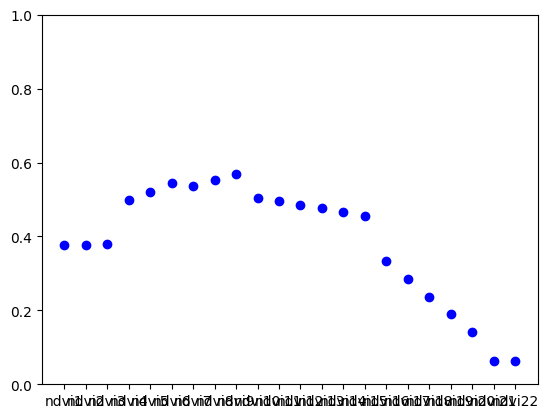

In [6]:
x = ndvi_senti2_data[0:1]
y = ['ndvi1','ndvi2','ndvi3','ndvi4','ndvi5','ndvi6','ndvi7','ndvi8','ndvi9','ndvi10','ndvi11',
     'ndvi12','ndvi13','ndvi14','ndvi15','ndvi16','ndvi17','ndvi18', 'ndvi19','ndvi20','ndvi21','ndvi22']
plt.ylim(0.0 , 1.0)
plt.scatter(y,x, c ="blue");

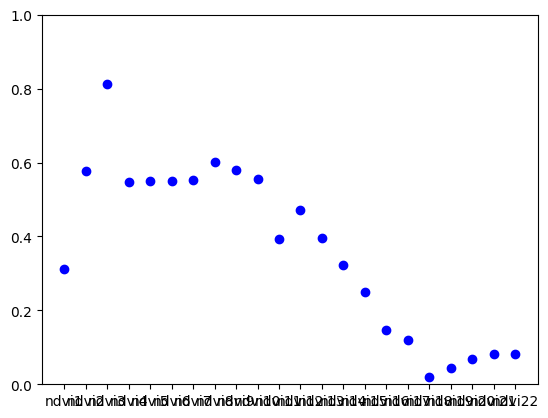

In [7]:
x = ndvi_senti2_data[-2:-1]
plt.ylim(0.0 , 1.0)
plt.scatter(y,x, c ="blue");

In [60]:
cols = ['ndvi1','ndvi2', 'ndvi3', 'ndvi4', 'ndvi5', 'ndvi6', 'ndvi7', 'ndvi8', 'ndvi9','ndvi10',
        'ndvi11', 'ndvi12', 'ndvi13', 'ndvi14', 'ndvi15', 'ndvi16',
        'ndvi17', 'ndvi18', 'ndvi19', 'ndvi20', 'ndvi21', 'ndvi22']


def fn_calculate_mean_var_NDVI(row,cols = cols):
    row['Nmean'] = row[cols].mean()
    row['Nvar'] = row[cols].var()
    row['Nmax'] = row[cols].max()
    row['Nmin'] = row[cols].min()
    row['Nmed'] = row[cols].median()
    row['Nsum'] = row[cols].sum()
    row['Nprod'] = row[cols].product()
    
    
    return row

In [9]:
df_mv = ndvi_senti2_data.apply(fn_calculate_mean_variance,axis = 1)

In [10]:
df_mv.head()

,ndvi1,ndvi2,ndvi3,ndvi4,ndvi5,ndvi6,ndvi7,ndvi8,ndvi9,ndvi10,...,ndvi20,ndvi21,ndvi22,Nmean,Nvar,Nmax,Nmin,Nmed,Nsum,Nprod
0,0.376791,0.376791,0.378848,0.498826,0.521321,0.543816,0.535979,0.553033,0.570087,0.505229,...,0.141656,0.062684,0.062684,0.388765,0.025643,0.570087,0.062684,0.461339,8.552825,3.762249e-11
1,0.408901,0.408901,0.412102,0.530364,0.543367,0.556371,0.531082,0.531229,0.517958,0.504687,...,0.057865,0.084296,0.084296,0.380674,0.025803,0.556371,0.057865,0.410501,8.374834,1.922881e-11
2,0.224021,0.465093,0.503938,0.490545,0.495297,0.500048,0.501823,0.486634,0.471445,0.471203,...,0.143174,0.138922,0.138922,0.336723,0.021059,0.503938,0.138922,0.329497,7.407906,3.860230e-12
3,0.509067,0.509067,0.496026,0.547530,0.418933,0.552316,0.536984,0.456716,0.296612,0.505535,...,0.066051,0.118557,0.118557,0.357108,0.028015,0.552316,0.066051,0.414058,7.856386,4.055905e-12
4,0.383767,0.494890,0.357247,0.544007,0.541654,0.539300,0.529429,0.555012,0.580595,0.489528,...,0.231776,0.232952,0.232952,0.388141,0.015873,0.580595,0.231776,0.362867,8.539112,2.846942e-10


In [11]:
features_data = df_mv[['Nmean','Nvar','Nmax','Nmin','Nmed','Nsum','Nprod']]
features_data.head()

,Nmean,Nvar,Nmax,Nmin,Nmed,Nsum,Nprod
0,0.388765,0.025643,0.570087,0.062684,0.461339,8.552825,3.762249e-11
1,0.380674,0.025803,0.556371,0.057865,0.410501,8.374834,1.922881e-11
2,0.336723,0.021059,0.503938,0.138922,0.329497,7.407906,3.860230e-12
3,0.357108,0.028015,0.552316,0.066051,0.414058,7.856386,4.055905e-12
4,0.388141,0.015873,0.580595,0.231776,0.362867,8.539112,2.846942e-10


## Joining the predictor variables and response variables

In [12]:
def combine_two_datasets(dataset1,dataset2):
    '''
    Returns a  vertically concatenated dataset.
    Attributes:
    dataset1 - Dataset 1 to be combined 
    dataset2 - Dataset 2 to be combined
    '''
    data = pd.concat([dataset1,dataset2], axis=1)
    return data

In [13]:
crop_data = combine_two_datasets(crop_yield_data,features_data)
crop_data.head()

,District,Latitude,Longitude,"Season(SA = Summer Autumn, WS = Winter Spring)","Rice Crop Intensity(D=Double, T=Triple)",Date of Harvest,Field size (ha),Rice Yield (kg/ha),Nmean,Nvar,Nmax,Nmin,Nmed,Nsum,Nprod
0,Chau_Phu,10.510542,105.248554,SA,T,15-07-2022,3.40,5500,0.388765,0.025643,0.570087,0.062684,0.461339,8.552825,3.762249e-11
1,Chau_Phu,10.509150,105.265098,SA,T,15-07-2022,2.43,6000,0.380674,0.025803,0.556371,0.057865,0.410501,8.374834,1.922881e-11
2,Chau_Phu,10.467721,105.192464,SA,D,15-07-2022,1.95,6400,0.336723,0.021059,0.503938,0.138922,0.329497,7.407906,3.860230e-12
3,Chau_Phu,10.494453,105.241281,SA,T,15-07-2022,4.30,6000,0.357108,0.028015,0.552316,0.066051,0.414058,7.856386,4.055905e-12
4,Chau_Phu,10.535058,105.252744,SA,D,14-07-2022,3.30,6400,0.388141,0.015873,0.580595,0.231776,0.362867,8.539112,2.846942e-10


## Model Building

In [14]:
crop_data = crop_data[['Nmean','Nvar','Nmax','Nmin','Nmed','Nsum','Nprod','Field size (ha)','Rice Crop Intensity(D=Double, T=Triple)','Rice Yield (kg/ha)']]

In [15]:
crop_data.head()

,Nmean,Nvar,Nmax,Nmin,Nmed,Nsum,Nprod,Field size (ha),"Rice Crop Intensity(D=Double, T=Triple)",Rice Yield (kg/ha)
0,0.388765,0.025643,0.570087,0.062684,0.461339,8.552825,3.762249e-11,3.40,T,5500
1,0.380674,0.025803,0.556371,0.057865,0.410501,8.374834,1.922881e-11,2.43,T,6000
2,0.336723,0.021059,0.503938,0.138922,0.329497,7.407906,3.860230e-12,1.95,D,6400
3,0.357108,0.028015,0.552316,0.066051,0.414058,7.856386,4.055905e-12,4.30,T,6000
4,0.388141,0.015873,0.580595,0.231776,0.362867,8.539112,2.846942e-10,3.30,D,6400


In [16]:
crop_data.shape

(557, 10)

In [17]:
crop_data['Rice Crop Intensity(D=Double, T=Triple)'] = crop_data['Rice Crop Intensity(D=Double, T=Triple)'].map({'D':2, 'T':3})

In [18]:
crop_data.head()

,Nmean,Nvar,Nmax,Nmin,Nmed,Nsum,Nprod,Field size (ha),"Rice Crop Intensity(D=Double, T=Triple)",Rice Yield (kg/ha)
0,0.388765,0.025643,0.570087,0.062684,0.461339,8.552825,3.762249e-11,3.40,3,5500
1,0.380674,0.025803,0.556371,0.057865,0.410501,8.374834,1.922881e-11,2.43,3,6000
2,0.336723,0.021059,0.503938,0.138922,0.329497,7.407906,3.860230e-12,1.95,2,6400
3,0.357108,0.028015,0.552316,0.066051,0.414058,7.856386,4.055905e-12,4.30,3,6000
4,0.388141,0.015873,0.580595,0.231776,0.362867,8.539112,2.846942e-10,3.30,2,6400


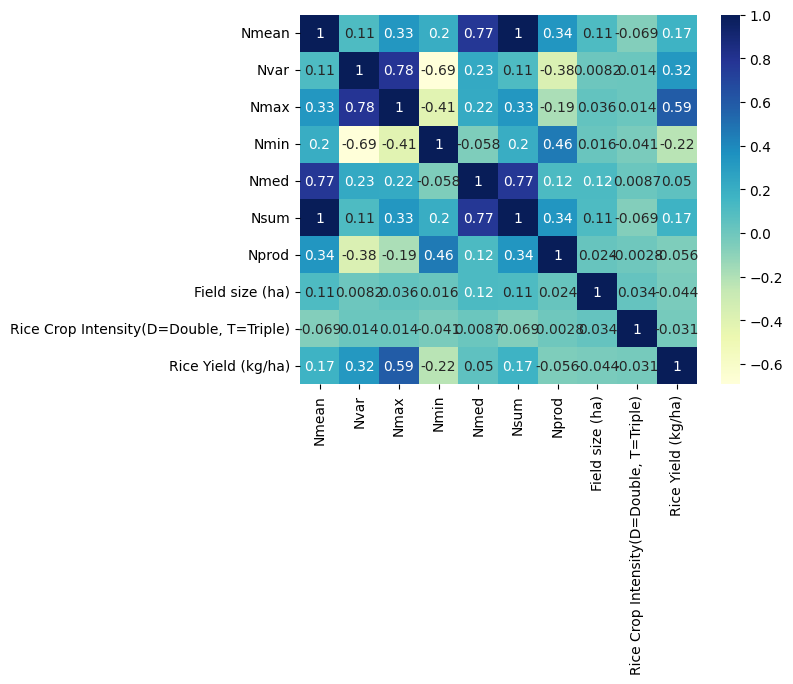

In [19]:
import seaborn as sns
# plotting correlation heatmap
dataplot = sns.heatmap(crop_data.corr(), cmap="YlGnBu", annot=True)

In [20]:
rvi_senti1_data = pd.read_csv('rvi_senti1_data_cloud_filter_rvi_19Columns_2022-1-1_2022-08-31.csv')
rvi_senti1_data.head()

,rvi1,rvi2,rvi3,rvi4,rvi5,rvi6,rvi7,rvi8,rvi9,rvi10,rvi11,rvi12,rvi13,rvi14,rvi15,rvi16,rvi17,rvi18,rvi19
0,0.113735,0.186966,0.245110,0.284318,0.739800,0.726788,0.911254,1.249259,1.087277,1.298704,0.905310,0.724559,0.892340,0.992373,1.233590,0.360264,0.951532,0.645184,NaN
1,0.624242,0.591372,0.511358,0.623711,0.621459,0.664539,0.610600,0.759752,0.484136,0.687636,0.535123,0.743160,0.543520,0.817069,0.525941,0.676428,0.522760,0.678030,NaN
2,0.533706,0.624086,1.020604,0.923790,1.078331,0.952361,0.926528,1.298710,1.107509,1.146596,0.859890,0.987663,0.699925,0.835756,0.994119,0.204313,0.217059,0.179915,NaN
3,0.202505,0.369731,0.986550,0.781011,1.104601,1.080304,1.037729,1.208616,0.757698,1.083723,0.886537,1.352689,0.609161,0.694525,0.799591,0.325308,0.225328,0.423441,NaN
4,0.625349,0.974279,0.528540,0.623982,0.730792,0.864505,1.011768,1.316121,1.031630,0.660723,0.889918,0.410435,0.362494,0.418922,0.424168,0.311175,0.175952,0.155280,NaN


In [21]:
rvi_senti1_data.interpolate(method='linear',axis=1, inplace=True)
rvi_senti1_data.interpolate(method='linear',limit_direction='backward',axis=1, inplace=True)

In [22]:
rvi_senti1_data.isnull().sum()

rvi1     0
rvi2     0
rvi3     0
rvi4     0
rvi5     0
rvi6     0
rvi7     0
rvi8     0
rvi9     0
rvi10    0
rvi11    0
rvi12    0
rvi13    0
rvi14    0
rvi15    0
rvi16    0
rvi17    0
rvi18    0
rvi19    0
dtype: int64

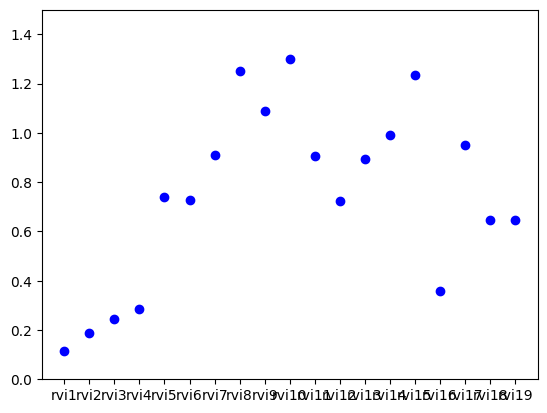

In [23]:
x = rvi_senti1_data[0:1]

y = ['rvi1','rvi2','rvi3','rvi4','rvi5','rvi6','rvi7','rvi8','rvi9','rvi10', 'rvi11','rvi12','rvi13','rvi14','rvi15',
     'rvi16','rvi17','rvi18','rvi19']
plt.ylim(0.0 , 1.5)
plt.scatter(y,x, c ="blue");

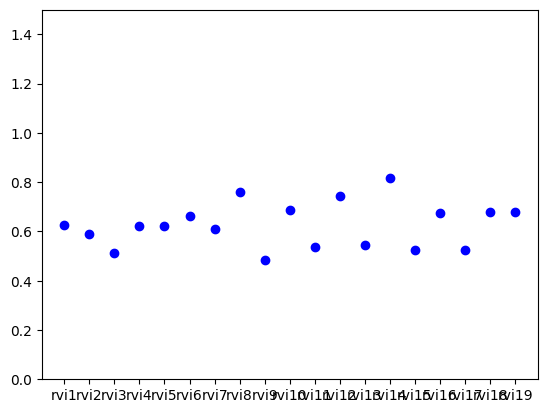

In [24]:
x = rvi_senti1_data[1:2]

y = ['rvi1','rvi2','rvi3','rvi4','rvi5','rvi6','rvi7','rvi8','rvi9','rvi10', 'rvi11','rvi12','rvi13','rvi14','rvi15',
     'rvi16','rvi17','rvi18','rvi19']
plt.ylim(0.0 , 1.5)
plt.scatter(y,x, c ="blue");

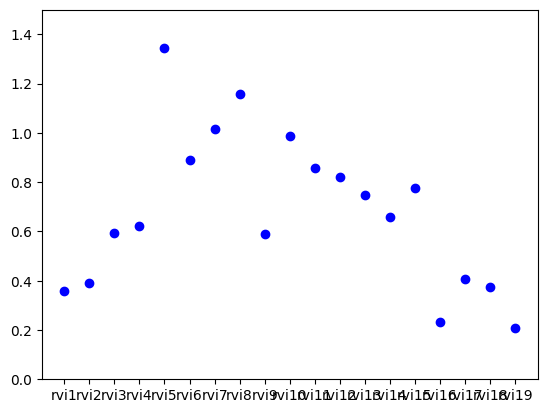

In [25]:
x = rvi_senti1_data[-2:-1]

y = ['rvi1','rvi2','rvi3','rvi4','rvi5','rvi6','rvi7','rvi8','rvi9','rvi10', 'rvi11','rvi12','rvi13','rvi14','rvi15',
     'rvi16','rvi17','rvi18','rvi19']
plt.ylim(0.0 , 1.5)
plt.scatter(y,x, c ="blue");

In [61]:
cols = ['rvi1','rvi2','rvi3','rvi4','rvi5','rvi6','rvi7','rvi8','rvi9','rvi10', 'rvi11','rvi12','rvi13','rvi14','rvi15',
     'rvi16','rvi17','rvi18','rvi19']


def fn_calculate_mean_var_RVI(row,cols = cols):
    row['RVImean'] = row[cols].mean()
    row['RVIvar'] = row[cols].var()
    row['RVImax'] = row[cols].max()
    row['RVImin'] = row[cols].min()
    row['RVImed'] = row[cols].median()
    row['RVIsum'] = row[cols].sum()
    row['RVIprod'] = row[cols].product()
    
    
    return row

In [28]:
df_mv = rvi_senti1_data.apply(fn_calculate_mean_var_RVI,axis = 1)

In [29]:
df_mv.head()

,rvi1,rvi2,rvi3,rvi4,rvi5,rvi6,rvi7,rvi8,rvi9,rvi10,...,rvi17,rvi18,rvi19,RVImean,RVIvar,RVImax,RVImin,RVImed,RVIsum,RVIprod
0,0.113735,0.186966,0.245110,0.284318,0.739800,0.726788,0.911254,1.249259,1.087277,1.298704,...,0.951532,0.645184,0.645184,0.747029,0.135350,1.298704,0.113735,0.739800,14.193546,0.000131
1,0.624242,0.591372,0.511358,0.623711,0.621459,0.664539,0.610600,0.759752,0.484136,0.687636,...,0.522760,0.678030,0.678030,0.626256,0.008435,0.817069,0.484136,0.623711,11.898865,0.000113
2,0.533706,0.624086,1.020604,0.923790,1.078331,0.952361,0.926528,1.298710,1.107509,1.146596,...,0.217059,0.179915,0.179915,0.777409,0.127094,1.298710,0.179915,0.923790,14.770777,0.000349
3,0.202505,0.369731,0.986550,0.781011,1.104601,1.080304,1.037729,1.208616,0.757698,1.083723,...,0.225328,0.423441,0.423441,0.755394,0.123127,1.352689,0.202505,0.781011,14.352492,0.000378
4,0.625349,0.974279,0.528540,0.623982,0.730792,0.864505,1.011768,1.316121,1.031630,0.660723,...,0.175952,0.155280,0.155280,0.614280,0.111159,1.316121,0.155280,0.623982,11.671313,0.000004


In [31]:
features_data = df_mv[['RVImean','RVIvar','RVImax','RVImin','RVImed','RVIsum','RVIprod']]
features_data.head()

,RVImean,RVIvar,RVImax,RVImin,RVImed,RVIsum,RVIprod
0,0.747029,0.135350,1.298704,0.113735,0.739800,14.193546,0.000131
1,0.626256,0.008435,0.817069,0.484136,0.623711,11.898865,0.000113
2,0.777409,0.127094,1.298710,0.179915,0.923790,14.770777,0.000349
3,0.755394,0.123127,1.352689,0.202505,0.781011,14.352492,0.000378
4,0.614280,0.111159,1.316121,0.155280,0.623982,11.671313,0.000004


In [32]:
crop_data = combine_two_datasets(crop_data,features_data)
crop_data.head()

,Nmean,Nvar,Nmax,Nmin,Nmed,Nsum,Nprod,Field size (ha),"Rice Crop Intensity(D=Double, T=Triple)",Rice Yield (kg/ha),RVImean,RVIvar,RVImax,RVImin,RVImed,RVIsum,RVIprod
0,0.388765,0.025643,0.570087,0.062684,0.461339,8.552825,3.762249e-11,3.40,3,5500,0.747029,0.135350,1.298704,0.113735,0.739800,14.193546,0.000131
1,0.380674,0.025803,0.556371,0.057865,0.410501,8.374834,1.922881e-11,2.43,3,6000,0.626256,0.008435,0.817069,0.484136,0.623711,11.898865,0.000113
2,0.336723,0.021059,0.503938,0.138922,0.329497,7.407906,3.860230e-12,1.95,2,6400,0.777409,0.127094,1.298710,0.179915,0.923790,14.770777,0.000349
3,0.357108,0.028015,0.552316,0.066051,0.414058,7.856386,4.055905e-12,4.30,3,6000,0.755394,0.123127,1.352689,0.202505,0.781011,14.352492,0.000378
4,0.388141,0.015873,0.580595,0.231776,0.362867,8.539112,2.846942e-10,3.30,2,6400,0.614280,0.111159,1.316121,0.155280,0.623982,11.671313,0.000004


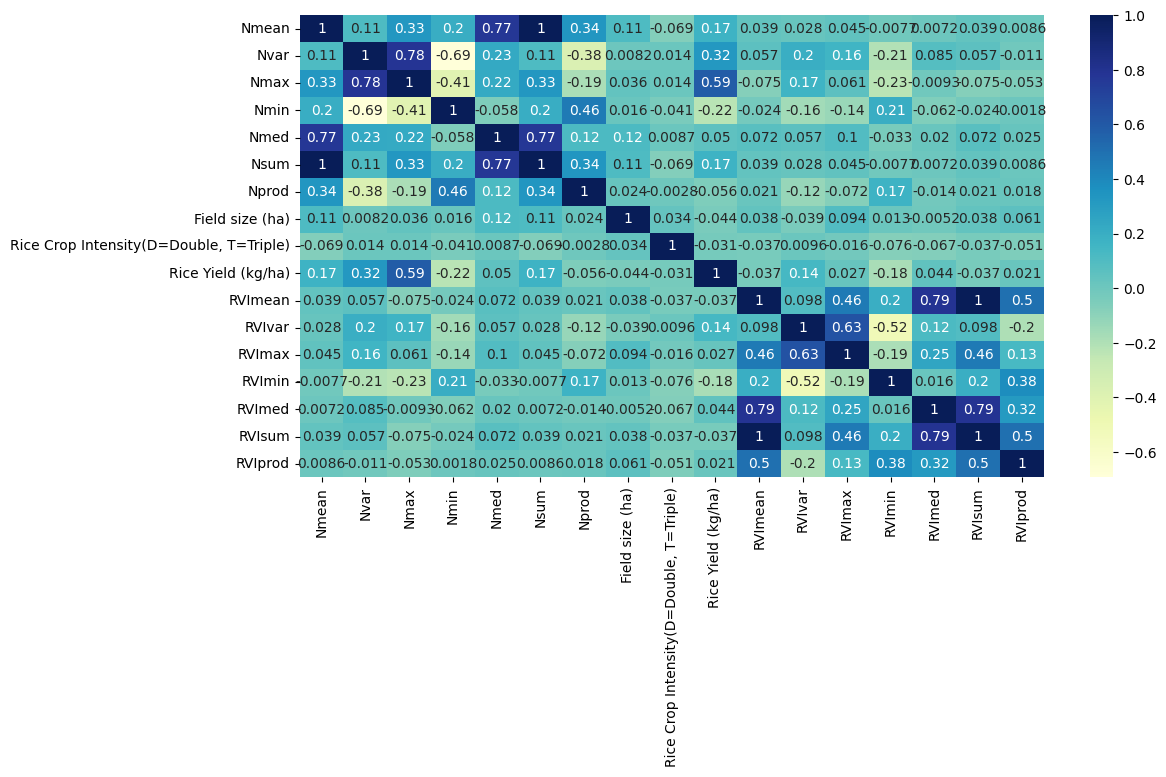

In [35]:
plt.figure(figsize=(12,6))
dataplot = sns.heatmap(crop_data.corr(), cmap="YlGnBu", annot=True)

In [82]:
crop_data.head()

,Nmean,Nvar,Nmax,Nmin,Nmed,Nsum,Nprod,Field size (ha),"Rice Crop Intensity(D=Double, T=Triple)",Rice Yield (kg/ha),RVImean,RVIvar,RVImax,RVImin,RVImed,RVIsum,RVIprod
0,0.388765,0.025643,0.570087,0.062684,0.461339,8.552825,3.762249e-11,3.40,3,5500,0.747029,0.135350,1.298704,0.113735,0.739800,14.193546,0.000131
1,0.380674,0.025803,0.556371,0.057865,0.410501,8.374834,1.922881e-11,2.43,3,6000,0.626256,0.008435,0.817069,0.484136,0.623711,11.898865,0.000113
2,0.336723,0.021059,0.503938,0.138922,0.329497,7.407906,3.860230e-12,1.95,2,6400,0.777409,0.127094,1.298710,0.179915,0.923790,14.770777,0.000349
3,0.357108,0.028015,0.552316,0.066051,0.414058,7.856386,4.055905e-12,4.30,3,6000,0.755394,0.123127,1.352689,0.202505,0.781011,14.352492,0.000378
4,0.388141,0.015873,0.580595,0.231776,0.362867,8.539112,2.846942e-10,3.30,2,6400,0.614280,0.111159,1.316121,0.155280,0.623982,11.671313,0.000004


In [84]:
crop_data.to_csv("Level2_train_data_NDVI_RVI_MeanVarMinMaxMedianSumProd.csv")

### Train and Test Split 

<p align="justify">We will now split the data into 80% training data and 20% test data. Scikit-learn alias “sklearn” is a robust library for machine learning in Python. The scikit-learn library has a <i><b>model_selection</b></i> module in which there is a splitting function <i><b>train_test_split</b></i>. You can use the same.</p>

In [36]:
X = crop_data.drop(columns=['Rice Yield (kg/ha)']).values
y = crop_data ['Rice Yield (kg/ha)'].values


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=40)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((389, 16), (168, 16), (389,), (168,))

### Model Training

<p justify ="align">Now that we have the data in a format appropriate for machine learning, we can begin training a model. In this demonstration notebook, we have used a Extra Tree Regressor  model from the scikit-learn library. This library offers a wide range of other models, each with the capacity for extensive parameter tuning and customization capabilities.</p>

<p justify ="align">Scikit-learn models require separation of predictor variables and the response variable. You have to store the predictor variables in array X and the response variable in the array Y. You must make sure not to include the response variable in array X.</p>

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [50, 100, 200, 300, 400,500],
    'max_depth': [1,2,3,4,5,6,7,8],
    'max_features': ['sqrt',],
    'criterion' :['squared_error',]
}
regr = RandomForestRegressor(random_state=0)

clf = GridSearchCV(regr, parameters , cv= 5, verbose=1)
clf.fit(X_train, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': ['sqrt'],
                         'n_estimators': [50, 100, 200, 300, 400]},
             verbose=1)

In [39]:
clf.best_estimator_

RandomForestRegressor(max_depth=6, max_features='sqrt', n_estimators=400,
                      random_state=0)

In [40]:
clf.best_score_

0.35512992187081494

In [41]:
model = clf.best_estimator_

In [100]:
lst = ['mean','variance','max','min','median','sum','product','Field size (ha)','Rice Crop Intensity(D, T)']

In [101]:
pd.DataFrame({'features':lst , 'fi':clf.feature_importances_}).sort_values(by='fi').reset_index(drop=True)

AttributeError: 'GridSearchCV' object has no attribute 'feature_importances_'

In [102]:
df = pd.DataFrame({'features':lst , 'fi':clf.feature_importances_}).sort_values(by='fi').reset_index(drop=True)
#df.plot(kind='bar')
plt.figure(figsize=(12,4))
plt.bar(df.features,df.fi);

AttributeError: 'GridSearchCV' object has no attribute 'feature_importances_'

## Model Evaluation

Now that we have trained our model , all that is left is to evaluate it. For evaluation we will generate the R2 Score. Scikit-learn provides many other metrics that can be used for evaluation. You can even write a code on your own.

### In-Sample Evaluation
<p align="Jutisfy"> We will be generating a R2 Score for the training data. It must be stressed that this is in-sample performance testing , which is the performance testing on the training dataset. These metrics are NOT truly indicative of the model's performance. You should wait to test the model performance on the test data before you feel confident about your model.</p>

In [42]:
insample_predictions = model.predict(X_train)
print("Insample R2 Score: {0:.2f}".format(r2_score(y_train,insample_predictions)))

outsample_predictions = model.predict(X_test)
print("Outsample R2 Score: {0:.2f}".format(r2_score(y_test,outsample_predictions)))

Insample R2 Score: 0.71
Outsample R2 Score: 0.45


In [43]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

estimator = XGBRegressor(random_state=2023)

parameters = {
    'max_depth':[2,3,5,10] , #range (2, 10, 2)
    'n_estimators': [50,100,200,250,300], #range(60, 220, 40)
    'learning_rate': [0.01,0.05,0.1] #[0.1, 0.01, 0.05]
}

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'neg_mean_squared_error', #neg_log_loss
    n_jobs=-1,
    cv = 5,
    verbose=True
)

grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=2023, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [2, 3, 5, 10],
                         'n_estimators': [50, 100, 200, 250, 300]},
             scoring='neg_mean_squared_error', verbose=True)

In [129]:
#import sklearn
#sklearn.metrics.get_scorer_names()

In [44]:
grid_search.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=2023, ...)

In [45]:
grid_search.best_params_

{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100}

In [46]:
model = grid_search.best_estimator_

In [47]:
insample_predictions = model.predict(X_train)
print("Insample R2 Score: {0:.2f}".format(r2_score(y_train,insample_predictions)))

outsample_predictions = model.predict(X_test)
print("Outsample R2 Score: {0:.2f}".format(r2_score(y_test,outsample_predictions)))

Insample R2 Score: 0.57
Outsample R2 Score: 0.49


In [48]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

In [49]:
insample_predictions = lr.predict(X_train)
print("Insample R2 Score: {0:.2f}".format(r2_score(y_train,insample_predictions)))

outsample_predictions = lr.predict(X_test)
print("Outsample R2 Score: {0:.2f}".format(r2_score(y_test,outsample_predictions)))

Insample R2 Score: 0.43
Outsample R2 Score: 0.47


In [50]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor( criterion='squared_error', splitter='best',
                            random_state=2023, max_leaf_nodes=None, ccp_alpha=0.0)



parameters = {
    'max_depth':[2,3,5,10] , #range (2, 10, 2)
    'min_samples_split': [2,3,5,10,12,14],
    'min_samples_leaf': [2,3,5,10],#range(60, 220, 40)
    
}

grid_search = GridSearchCV(
    estimator=dt,
    param_grid=parameters,
    scoring = 'neg_mean_squared_error', #neg_log_loss
    n_jobs=-1,
    cv = 5,
    verbose=True
)

grid_search.fit(X_train,y_train)


Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=2023),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [2, 3, 5, 10],
                         'min_samples_split': [2, 3, 5, 10, 12, 14]},
             scoring='neg_mean_squared_error', verbose=True)

In [51]:
grid_search.best_params_

{'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 2}

In [52]:
dtmodel = grid_search.best_estimator_

In [53]:
insample_predictions = dtmodel.predict(X_train)
print("Insample R2 Score: {0:.2f}".format(r2_score(y_train,insample_predictions)))

outsample_predictions = dtmodel.predict(X_test)
print("Outsample R2 Score: {0:.2f}".format(r2_score(y_test,outsample_predictions)))

Insample R2 Score: 0.44
Outsample R2 Score: 0.48


## Submission

Once you are happy with your model, you can make a submission. To make a submission, you will need to use your model to make the yield predictions of rice crop for a set of test coordinates we have provided in the <a href="https://challenge.ey.com/api/v1/storage/admin-files/8515054086281302-63ca8f827b1fe300146c7e21-challenge_2_submission_template.csv"><b>"challenge_2_submission_template.csv"</b></a> file and upload the file onto the challenge platform.

In [54]:
test_file = pd.read_csv('Challenge_2_submission_template.csv')
test_file.head()

,ID No,District,Latitude,Longitude,"Season(SA = Summer Autumn, WS = Winter Spring)","Rice Crop Intensity(D=Double, T=Triple)",Date of Harvest,Field size (ha),Predicted Rice Yield (kg/ha)
0,1,Chau_Phu,10.542192,105.187920,WS,T,10-04-2022,1.40,NaN
1,2,Chau_Thanh,10.400189,105.331053,SA,T,15-07-2022,1.32,NaN
2,3,Chau_Phu,10.505489,105.203926,SA,D,14-07-2022,1.40,NaN
3,4,Chau_Phu,10.523520,105.138274,WS,D,10-04-2022,1.80,NaN
4,5,Thoai_Son,10.294660,105.248528,SA,T,20-07-2022,2.20,NaN


In [55]:
ndvi_senti2_test_data = pd.read_csv("ndvi_senti2_test_data_cloud_filter_ndvi_22Columns_2022-1-1_2022-08-31.csv")

In [56]:
ndvi_senti2_test_data

,ndvi1,ndvi2,ndvi3,ndvi4,ndvi5,ndvi6,ndvi7,ndvi8,ndvi9,ndvi10,...,ndvi13,ndvi14,ndvi15,ndvi16,ndvi17,ndvi18,ndvi19,ndvi20,ndvi21,ndvi22
0,0.282743,0.456203,0.594217,0.442556,0.431979,0.449025,0.535366,0.588129,NaN,0.538117,...,NaN,0.399736,0.465525,0.303536,0.327322,0.079467,0.061504,-0.029683,0.130612,NaN
1,0.547258,NaN,0.383037,0.535284,0.378712,0.568067,0.541296,0.534345,0.541824,0.501829,...,NaN,NaN,NaN,0.232284,0.098399,NaN,NaN,0.132437,0.161114,NaN
2,NaN,0.409212,0.484517,0.489335,NaN,0.510049,0.508518,NaN,0.564209,0.478446,...,0.348289,0.169412,0.385222,0.335924,0.304442,NaN,NaN,0.146243,0.076189,NaN
3,0.595165,0.680062,0.718707,0.539280,0.562533,0.540928,0.559000,0.545691,NaN,0.508943,...,NaN,0.350952,0.346497,NaN,0.233503,0.140869,0.077257,0.083575,0.188379,NaN
4,0.544025,NaN,0.412673,0.565902,NaN,0.456121,0.522443,NaN,0.394202,0.433172,...,NaN,NaN,0.117186,-0.075285,0.077861,NaN,0.351529,0.070375,0.124148,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NaN,0.466455,0.478505,0.467391,0.428035,NaN,0.517535,0.044119,0.461804,0.440169,...,0.379783,0.316556,0.200283,0.038256,0.173310,NaN,NaN,NaN,0.167043,NaN
96,0.245359,0.464073,0.648603,0.382238,0.466045,0.542176,0.604977,0.507143,NaN,0.528166,...,NaN,0.412345,0.448785,0.192656,0.306700,0.076614,0.074299,0.221325,0.103029,NaN
97,0.395614,0.504941,0.512471,0.516998,NaN,0.535602,0.515669,NaN,0.526515,0.483840,...,NaN,0.246980,0.220862,NaN,0.111875,NaN,NaN,0.064413,0.209292,NaN
98,0.471869,0.524255,0.566751,0.550026,NaN,NaN,0.576071,0.552859,0.547829,0.505763,...,NaN,0.290508,0.324336,0.231810,0.193249,0.163176,NaN,0.047273,0.089518,NaN


In [57]:
ndvi_senti2_test_data.interpolate(method='linear',axis=1, inplace=True)
ndvi_senti2_test_data.interpolate(method='linear',limit_direction='backward',axis=1, inplace=True)

In [58]:
ndvi_senti2_test_data.isnull().sum()

ndvi1     0
ndvi2     0
ndvi3     0
ndvi4     0
ndvi5     0
ndvi6     0
ndvi7     0
ndvi8     0
ndvi9     0
ndvi10    0
ndvi11    0
ndvi12    0
ndvi13    0
ndvi14    0
ndvi15    0
ndvi16    0
ndvi17    0
ndvi18    0
ndvi19    0
ndvi20    0
ndvi21    0
ndvi22    0
dtype: int64

In [62]:
df_mv_test = ndvi_senti2_test_data.apply(fn_calculate_mean_var_NDVI,axis = 1)

In [63]:
features_data_test = df_mv_test[['Nmean','Nvar','Nmax','Nmin','Nmed','Nsum','Nprod']]
features_data_test.head()

,Nmean,Nvar,Nmax,Nmin,Nmed,Nsum,Nprod
0,0.370607,0.034404,0.594217,-0.029683,0.442068,8.153363,-2.923528e-12
1,0.356739,0.028238,0.568067,0.098399,0.380874,7.848265,5.689094e-12
2,0.364040,0.022833,0.564209,0.076189,0.400443,8.008886,1.254719e-11
3,0.410821,0.036894,0.718707,0.077257,0.477990,9.038062,9.596972e-11
4,0.312800,0.033893,0.565902,-0.075285,0.360752,6.881594,-1.624158e-13


In [64]:
feature_test = combine_two_datasets(test_file,features_data_test)
feature_test.head()

,ID No,District,Latitude,Longitude,"Season(SA = Summer Autumn, WS = Winter Spring)","Rice Crop Intensity(D=Double, T=Triple)",Date of Harvest,Field size (ha),Predicted Rice Yield (kg/ha),Nmean,Nvar,Nmax,Nmin,Nmed,Nsum,Nprod
0,1,Chau_Phu,10.542192,105.187920,WS,T,10-04-2022,1.40,NaN,0.370607,0.034404,0.594217,-0.029683,0.442068,8.153363,-2.923528e-12
1,2,Chau_Thanh,10.400189,105.331053,SA,T,15-07-2022,1.32,NaN,0.356739,0.028238,0.568067,0.098399,0.380874,7.848265,5.689094e-12
2,3,Chau_Phu,10.505489,105.203926,SA,D,14-07-2022,1.40,NaN,0.364040,0.022833,0.564209,0.076189,0.400443,8.008886,1.254719e-11
3,4,Chau_Phu,10.523520,105.138274,WS,D,10-04-2022,1.80,NaN,0.410821,0.036894,0.718707,0.077257,0.477990,9.038062,9.596972e-11
4,5,Thoai_Son,10.294660,105.248528,SA,T,20-07-2022,2.20,NaN,0.312800,0.033893,0.565902,-0.075285,0.360752,6.881594,-1.624158e-13


In [65]:
submission_features_data = feature_test[['Nmean','Nvar','Nmax','Nmin','Nmed','Nsum','Nprod','Field size (ha)','Rice Crop Intensity(D=Double, T=Triple)']]

In [68]:
submission_features_data.head()

,Nmean,Nvar,Nmax,Nmin,Nmed,Nsum,Nprod,Field size (ha),"Rice Crop Intensity(D=Double, T=Triple)"
0,0.370607,0.034404,0.594217,-0.029683,0.442068,8.153363,-2.923528e-12,1.40,3
1,0.356739,0.028238,0.568067,0.098399,0.380874,7.848265,5.689094e-12,1.32,3
2,0.364040,0.022833,0.564209,0.076189,0.400443,8.008886,1.254719e-11,1.40,2
3,0.410821,0.036894,0.718707,0.077257,0.477990,9.038062,9.596972e-11,1.80,2
4,0.312800,0.033893,0.565902,-0.075285,0.360752,6.881594,-1.624158e-13,2.20,3


In [67]:
submission_features_data['Rice Crop Intensity(D=Double, T=Triple)'] = submission_features_data['Rice Crop Intensity(D=Double, T=Triple)'].map({'D':2, 'T':3})

In [69]:
rvi_senti1_test_data = pd.read_csv("rvi_senti1_test_data_19Columns_2022-1-1_2022-08-31.csv")

In [ ]:
rvi_senti1_test_data.interpolate(method='linear',axis=1, inplace=True)
rvi_senti1_test_data.interpolate(method='linear',limit_direction='backward',axis=1, inplace=True)

In [70]:
df_mv_test = rvi_senti1_test_data.apply(fn_calculate_mean_var_RVI,axis = 1)

In [71]:
df_mv_test.head()

,rvi1,rvi2,rvi3,rvi4,rvi5,rvi6,rvi7,rvi8,rvi9,rvi10,...,rvi17,rvi18,rvi19,RVImean,RVIvar,RVImax,RVImin,RVImed,RVIsum,RVIprod
0,0.682880,0.928259,0.145460,0.225869,0.583081,0.620909,0.233704,0.171592,0.587531,0.901531,...,0.777978,0.871329,0.756400,0.666256,0.097908,1.175484,0.145460,0.682880,12.658856,0.000024
1,0.141709,0.189803,0.960661,0.614808,1.198805,0.827285,1.003103,0.970548,0.823068,1.059437,...,0.937539,0.412829,NaN,0.725991,0.098739,1.198805,0.141709,0.825177,13.067841,0.000283
2,0.294506,0.382623,0.279592,0.176745,0.729364,0.720249,0.714439,0.839250,0.574028,0.666229,...,0.498394,0.895533,NaN,0.648681,0.079078,1.200444,0.176745,0.717344,11.676265,0.000052
3,0.162929,0.186460,1.143312,0.697362,1.065792,0.821447,1.069030,1.128584,0.781732,1.011889,...,0.604536,0.441159,0.927643,0.842393,0.098493,1.301266,0.162929,0.927643,16.005474,0.004385
4,0.119191,0.180375,0.373010,0.264501,0.828774,1.053975,1.233110,1.049015,1.104729,0.865627,...,0.369916,0.504678,NaN,0.638727,0.112280,1.233110,0.119191,0.626233,11.497088,0.000015


In [72]:
features_data_test = df_mv_test[['RVImean','RVIvar','RVImax','RVImin','RVImed','RVIsum','RVIprod']]
features_data_test.head()

,RVImean,RVIvar,RVImax,RVImin,RVImed,RVIsum,RVIprod
0,0.666256,0.097908,1.175484,0.145460,0.682880,12.658856,0.000024
1,0.725991,0.098739,1.198805,0.141709,0.825177,13.067841,0.000283
2,0.648681,0.079078,1.200444,0.176745,0.717344,11.676265,0.000052
3,0.842393,0.098493,1.301266,0.162929,0.927643,16.005474,0.004385
4,0.638727,0.112280,1.233110,0.119191,0.626233,11.497088,0.000015


In [73]:
submission_data = combine_two_datasets(submission_features_data,features_data_test)
submission_data.head()

,Nmean,Nvar,Nmax,Nmin,Nmed,Nsum,Nprod,Field size (ha),"Rice Crop Intensity(D=Double, T=Triple)",RVImean,RVIvar,RVImax,RVImin,RVImed,RVIsum,RVIprod
0,0.370607,0.034404,0.594217,-0.029683,0.442068,8.153363,-2.923528e-12,1.40,3,0.666256,0.097908,1.175484,0.145460,0.682880,12.658856,0.000024
1,0.356739,0.028238,0.568067,0.098399,0.380874,7.848265,5.689094e-12,1.32,3,0.725991,0.098739,1.198805,0.141709,0.825177,13.067841,0.000283
2,0.364040,0.022833,0.564209,0.076189,0.400443,8.008886,1.254719e-11,1.40,2,0.648681,0.079078,1.200444,0.176745,0.717344,11.676265,0.000052
3,0.410821,0.036894,0.718707,0.077257,0.477990,9.038062,9.596972e-11,1.80,2,0.842393,0.098493,1.301266,0.162929,0.927643,16.005474,0.004385
4,0.312800,0.033893,0.565902,-0.075285,0.360752,6.881594,-1.624158e-13,2.20,3,0.638727,0.112280,1.233110,0.119191,0.626233,11.497088,0.000015


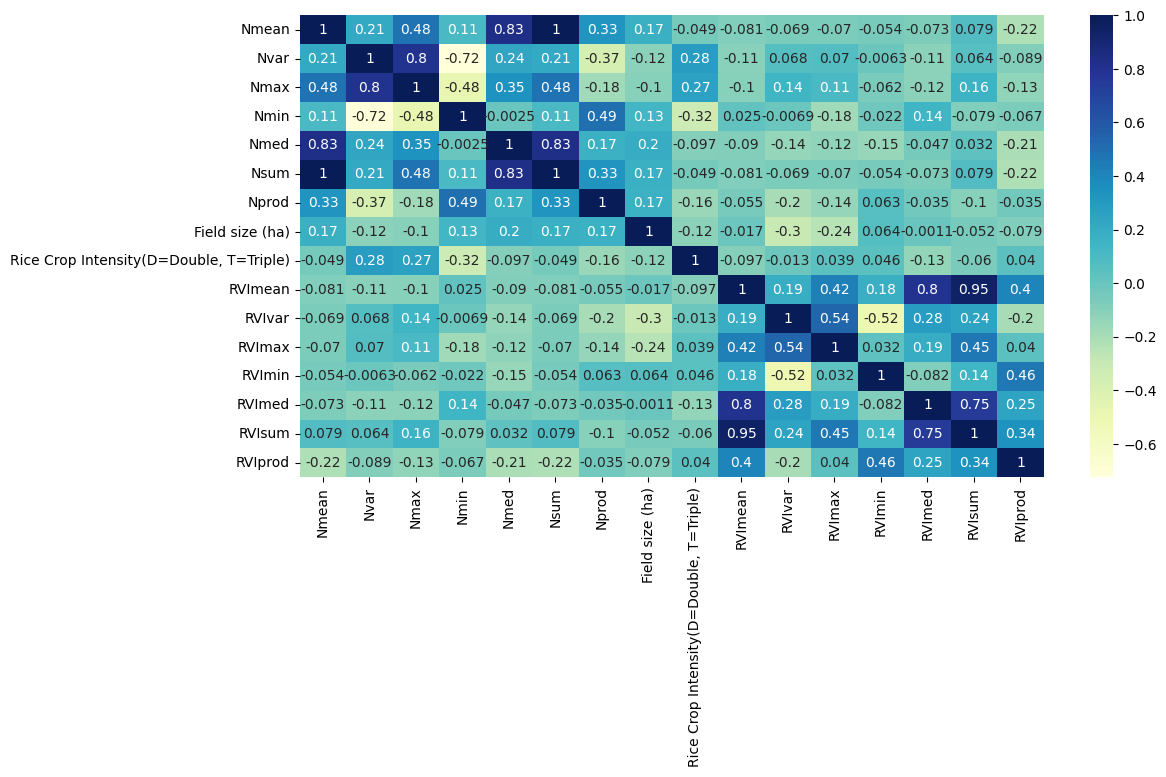

In [75]:
plt.figure(figsize=(12,6))
dataplot = sns.heatmap(submission_data.corr(), cmap="YlGnBu", annot=True)

In [85]:
submission_data.to_csv("Level2_test_data_NDVI_RVI_MeanVarMinMaxMedianSumProd.csv")

In [77]:
#Making predictions
final_predictions = model.predict(submission_data.values)
final_prediction_series = pd.Series(final_predictions)

In [78]:
#Combining the results into dataframe
test_file['Predicted Rice Yield (kg/ha)']=list(final_prediction_series)

In [79]:
test_file

,ID No,District,Latitude,Longitude,"Season(SA = Summer Autumn, WS = Winter Spring)","Rice Crop Intensity(D=Double, T=Triple)",Date of Harvest,Field size (ha),Predicted Rice Yield (kg/ha)
0,1,Chau_Phu,10.542192,105.187920,WS,T,10-04-2022,1.40,6125.736816
1,2,Chau_Thanh,10.400189,105.331053,SA,T,15-07-2022,1.32,6050.390625
2,3,Chau_Phu,10.505489,105.203926,SA,D,14-07-2022,1.40,6140.834961
3,4,Chau_Phu,10.523520,105.138274,WS,D,10-04-2022,1.80,7037.323242
4,5,Thoai_Son,10.294660,105.248528,SA,T,20-07-2022,2.20,6163.353027
...,...,...,...,...,...,...,...,...,...
95,96,Chau_Thanh,10.435839,105.132981,SA,D,26-07-2022,1.21,6154.392578
96,97,Chau_Phu,10.529357,105.147388,WS,T,10-04-2022,2.00,7034.879883
97,98,Chau_Thanh,10.452537,105.205118,SA,T,20-07-2022,5.50,6104.054688
98,99,Chau_Thanh,10.394341,105.126836,SA,T,14-07-2022,4.40,6096.166992


In [81]:
#Dumping the predictions into a csv file.
test_file.to_csv("challenge_2_submission_rice_crop_yield_pred_NDVI_RVI_XGBRegressor.csv",index = False)

In [80]:
test_file['Predicted Rice Yield (kg/ha)'].round(0)

0     6126.0
1     6050.0
2     6141.0
3     7037.0
4     6163.0
       ...  
95    6154.0
96    7035.0
97    6104.0
98    6096.0
99    7108.0
Name: Predicted Rice Yield (kg/ha), Length: 100, dtype: float64

In [93]:
test_file['Predicted Rice Yield (kg/ha)'] = test_file['Predicted Rice Yield (kg/ha)'].round(0)

In [94]:
#Dumping the predictions into a csv file.
test_file.to_csv("challenge_2_submission_rice_crop_yield_predictionExtraTreeround0.csv",index = False)

In [95]:
test_file

,ID No,District,Latitude,Longitude,"Season(SA = Summer Autumn, WS = Winter Spring)","Rice Crop Intensity(D=Double, T=Triple)",Date of Harvest,Field size (ha),Predicted Rice Yield (kg/ha)
0,1,Chau_Phu,10.542192,105.187920,WS,T,10-04-2022,1.40,6109.0
1,2,Chau_Thanh,10.400189,105.331053,SA,T,15-07-2022,1.32,6141.0
2,3,Chau_Phu,10.505489,105.203926,SA,D,14-07-2022,1.40,6371.0
3,4,Chau_Phu,10.523520,105.138274,WS,D,10-04-2022,1.80,7196.0
4,5,Thoai_Son,10.294660,105.248528,SA,T,20-07-2022,2.20,6072.0
...,...,...,...,...,...,...,...,...,...
95,96,Chau_Thanh,10.435839,105.132981,SA,D,26-07-2022,1.21,6085.0
96,97,Chau_Phu,10.529357,105.147388,WS,T,10-04-2022,2.00,7062.0
97,98,Chau_Thanh,10.452537,105.205118,SA,T,20-07-2022,5.50,6169.0
98,99,Chau_Thanh,10.394341,105.126836,SA,T,14-07-2022,4.40,5958.0
